In [133]:
import sys 
sys.path.append('./src/')
from helper_for_assignment_2 import *
import warnings
warnings.filterwarnings('ignore')

# problem_1
Build a multimodal Gaussian distribution with synthetic data

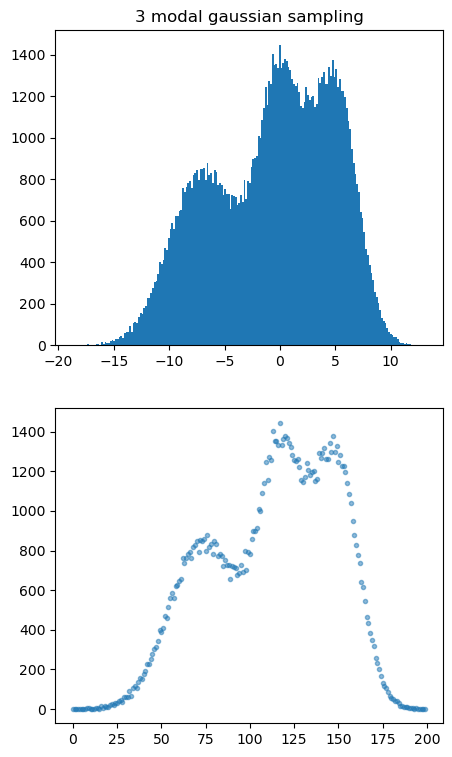

In [135]:
# in this case, I will use 3 gaussian for this case
# setting parameters
mu = [-7, 0, 5]
sd = [3, 2, 2]
size = 120000
bins = 200

# get sampling
gausian_sample = modal_gaussian_sampling(mu, sd, size)

# do the plot
plt.figure(figsize=(5, 9))

plt.subplot(2, 1, 1)
n, bins, patch = plt.hist(gausian_sample, bins=bins)
plt.title("3 modal gaussian sampling")

plt.subplot(2, 1, 2)
y = n
x = np.arange(len(n)).reshape((-1, 1))

plt.scatter(x, y, marker='.', alpha=0.5)

plt.show()

# problem_2
Construct a piecewise linear regression and plot the result with its splines 
and knots

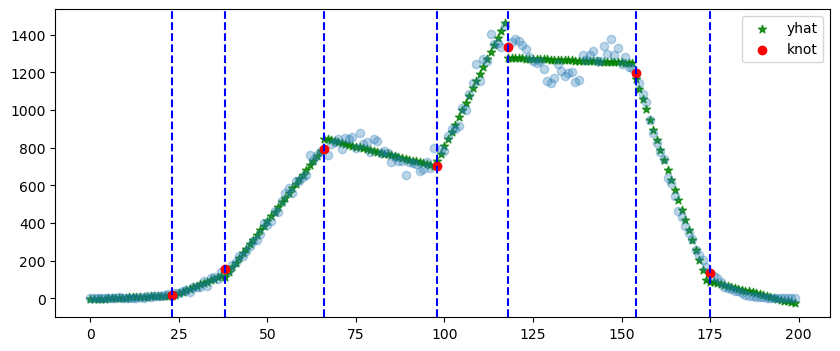

In [136]:
# some hyperparameters
iteration = 1000 
n_knots = 7 

# prediction 
pwr = Pwr_linear(n_knots, x, y)
pwr.train_iter(iteration)
yhat, mse = pwr.best_prediction()

# plot
plt.figure(figsize=(10, 4))
plt.scatter(x, yhat, c='green', marker='*', label='yhat', alpha=0.8)
plt.legend()
pwr.plot_knot_spine(pwr.best_knot)



# problem_3
Construct a piecewise polynomial regression and plot the result, its 
splines, and knots.

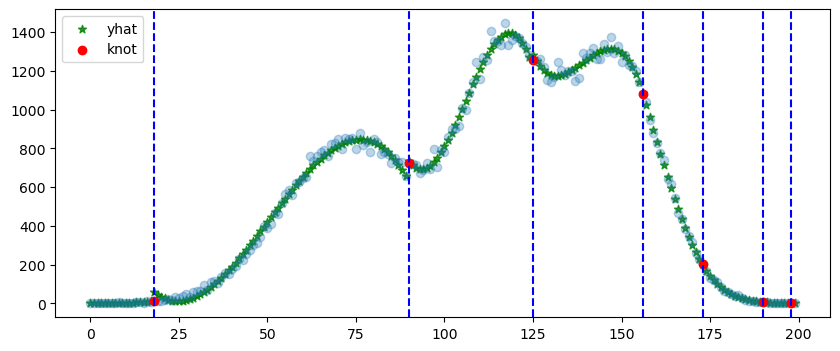

In [139]:
# some hyper parameter
degree = 3
iteration = 1000 
n_knot = 7

# make prediction 
pwr_poly = Pwr_poly(n_knot, x.reshape(-1,), y, degree)
pwr_poly.train_iter(iteration)
yhat, mse = pwr_poly.best_prediction()

# plot 
plt.figure(figsize=(10, 4))
plt.scatter(x, yhat, c='green', marker='*', label='yhat', alpha=0.8)
plt.legend()
pwr_poly.plot_knot_spine(pwr_poly.best_knot)


# problem_5
Try to model the multimodal Gaussian distribution built with single 
polynomial regression.

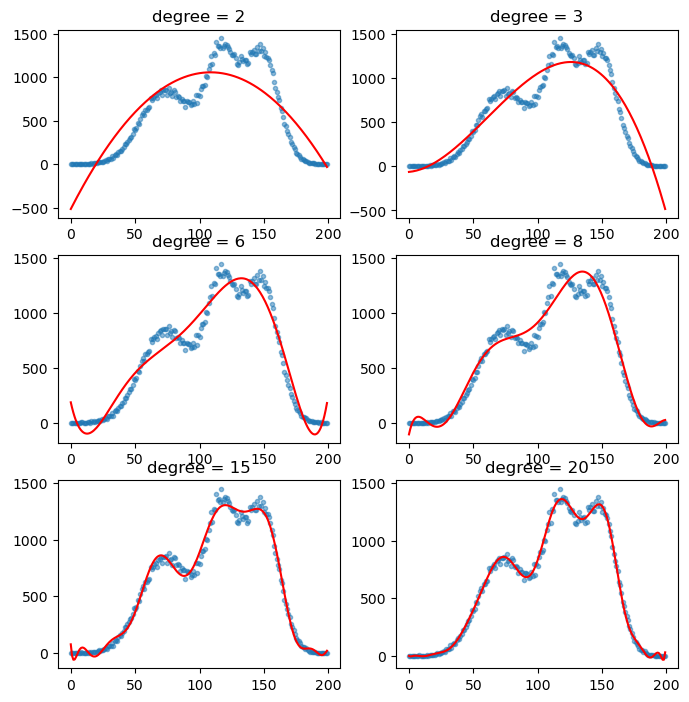

In [140]:
# define the degree
degree = [2, 3, 6, 8, 15,20]

# plot them
plot_poly_regression(degree, y, fig_size=(8, 20))
plt.show()

# problem_6
Measure and report the execution time of tasks (2), task (3), and task 
(5).  Then report the differences in execution time (no plot required, but 
you need to report them in a table). Hint: use excel for table drawing and 
add it in the word file.

In [143]:
import time 

# piecewise linear regression 
# hypterparameter setting
iteration = 1000 
n_knot = 7 
# counting time
s = time.time()
 
pwr = Pwr_linear(n_knots, x, y)
pwr.train_iter(iteration)
yhat, mse = pwr.best_prediction()

t1 = time.time() - s


# piecewise polynomial
# hypterparameter setting
iteration = 1000 
n_knot = 7
degree = 3
# counting time
s = time.time() 

pwr_poly = Pwr_poly(n_knot, x.reshape(-1,), y, degree)
pwr_poly.train_iter(iteration)
yhat, mse = pwr_poly.best_prediction()

t2 = time.time() - s


# single poly nomial
# hypterparameter setting
degree = 20 
dummy_x = list(range(len(y)))
# counting time
s = time.time() 
model = np.poly1d( np.polyfit( dummy_x, y, deg=degree))
yhat = model(list(range(len(y))))
mse = mean_squared_error(yhat, y)
t3 = time.time() - s


print(t1, t2, t3)

5.608816623687744 2.872753858566284 0.0009999275207519531


# problem_7
Use the Multimodal Gaussian distribution of Tasks 5, apply Ridge, 
LASSO and compare their accuracy and number of parameters, 
parameters coefficient with Polynomial regression. Here you should also 
report and discuss the differences (if there are any differences)

           20             19             18             17
4.335e-35 x  - 6.043e-32 x  + 3.518e-29 x  - 1.046e-26 x 
              16            15             14             13
 + 1.328e-24 x  + 1.11e-22 x  - 6.218e-20 x  + 5.472e-18 x 
              12             11             10             9
 + 1.302e-15 x  - 4.606e-13 x  + 7.066e-11 x  - 6.815e-09 x
              8             7             6           5          4
 + 4.485e-07 x - 2.056e-05 x + 0.0006521 x - 0.01393 x + 0.1908 x
          3         2
 - 1.539 x + 6.318 x - 9.598 x + 2.079


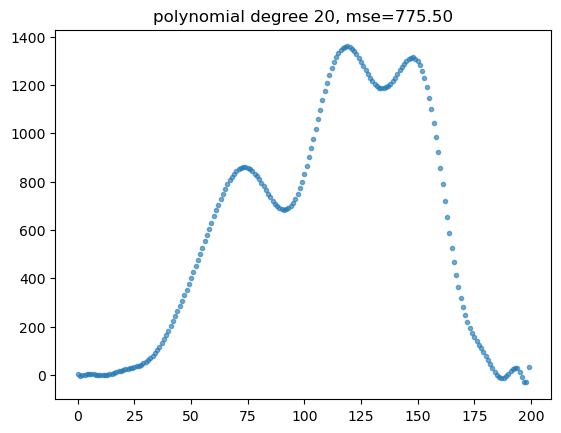

In [172]:
from statistics import mode
from turtle import shape
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

x_poly = list(range(len(y)))
x_lasso = np.arange(len(n)).reshape((-1, 1))
x_ridge = np.arange(len(n)).reshape((-1, 1))

# degree = 20 polynomial regression from task 5 
model = np.poly1d( np.polyfit( x_poly, y, deg=degree))
print(model)
plt.figure()
plt.scatter(x_poly, model(x_poly), marker='.', alpha=0.6)
plt.title(f'polynomial degree 20, mse={mean_squared_error(model(x_poly), y):.2f}')
plt.show()

# lasso 


# ridge

